# Text Processing and Clustering Example

This notebook demonstrates basic text processing and clustering using Python. We'll clean sample sentences, extract features, apply K-Means clustering, and visualize the results. Each step is explained with comments and markdown.

In [11]:
# Import Required Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Create Example Sentences

Let's create a small set of sample sentences to demonstrate text processing and clustering.

In [19]:
# Create a list of 1000 synthetic sentences: 500 about animals, 500 about household items
import random
animal_subjects = ["cat", "rat", "tiger", "dog", "lion", "elephant", "rabbit", "hamster", "parrot", "cow"]
animal_verbs = ["sat", "jumped", "ran", "slept", "ate", "played", "roared", "hunted", "rested", "hid"]
animal_objects = ["mat", "grass", "water", "food", "nest", "bed", "field", "cage", "barn", "tree"]

house_subjects = ["bed", "home", "cupboard", "cup", "table", "chair", "sofa", "lamp", "door", "window"]
house_verbs = ["stood", "opened", "closed", "was cleaned", "was moved", "was painted", "was fixed", "was used", "was bought", "was sold"]
house_objects = ["room", "hall", "kitchen", "living room", "corner", "wall", "floor", "shelf", "drawer", "balcony"]

extras = ["happily", "quickly", "loudly", "silently", "gracefully", "eagerly", "curiously", "bravely", "calmly", "sadly"]

sentences = []
labels = []
for _ in range(500):
    s = f"The {random.choice(animal_subjects)} {random.choice(animal_verbs)} on the {random.choice(animal_objects)} {random.choice(extras)}."
    sentences.append(s)
    labels.append("animal")
for _ in range(500):
    s = f"The {random.choice(house_subjects)} {random.choice(house_verbs)} in the {random.choice(house_objects)} {random.choice(extras)}."
    sentences.append(s)
    labels.append("household")

# Display the sentences and labels
df = pd.DataFrame({'sentence': sentences, 'label': labels})
display(df)

,sentence,label
0,The cow ate on the bed eagerly.,animal
1,The cat slept on the water curiously.,animal
2,The hamster hid on the mat silently.,animal
3,The dog slept on the tree sadly.,animal
4,The lion jumped on the grass sadly.,animal
...,...,...
995,The home was fixed in the balcony quickly.,household
996,The window was sold in the corner eagerly.,household
997,The table was cleaned in the kitchen happily.,household
998,The window was painted in the floor silently.,household


## Text Cleaning and Feature Extraction

We'll use TF-IDF to convert sentences into numerical features suitable for clustering. TF-IDF reflects the importance of words in each sentence relative to the whole set.

In [20]:
# Convert sentences to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

# Show the TF-IDF matrix
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,ate,balcony,barn,bed,bought,bravely,cage,calmly,cat,chair,...,stood,table,the,tiger,tree,used,wall,was,water,window
0,0.539733,0.000000,0.0,0.426433,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.255805,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.504027,0.0,...,0.0,0.000000,0.253475,0.0,0.000000,0.0,0.0,0.000000,0.48343,0.000000
2,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.254206,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.246403,0.0,0.508152,0.0,0.0,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.243015,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.456083,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.242235,0.0,0.000000,0.0,0.0,0.249433,0.00000,0.000000
996,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.242963,0.0,0.000000,0.0,0.0,0.250183,0.00000,0.476180
997,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.473723,0.245090,0.0,0.000000,0.0,0.0,0.252373,0.00000,0.000000
998,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.237870,0.0,0.000000,0.0,0.0,0.244938,0.00000,0.466198


## Clustering Sentences

Now we'll use K-Means clustering to group similar sentences based on their TF-IDF features. Clustering helps discover patterns or groups in text data.

In [21]:
# Apply K-Means clustering (let's use 2 clusters for simplicity)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['cluster'] = clusters
display(df)

,sentence,label,cluster
0,The cow ate on the bed eagerly.,animal,0
1,The cat slept on the water curiously.,animal,0
2,The hamster hid on the mat silently.,animal,0
3,The dog slept on the tree sadly.,animal,0
4,The lion jumped on the grass sadly.,animal,0
...,...,...,...
995,The home was fixed in the balcony quickly.,household,1
996,The window was sold in the corner eagerly.,household,1
997,The table was cleaned in the kitchen happily.,household,1
998,The window was painted in the floor silently.,household,1


## Visualizing Clusters

Let's visualize which sentences belong to each cluster. This helps us see how text processing and clustering can group similar sentences together.

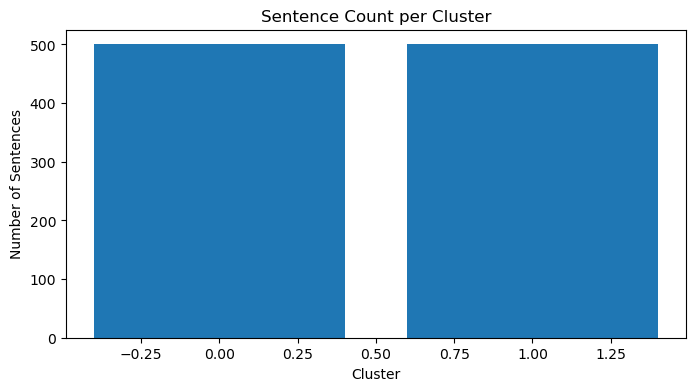

Cluster 0:
  - The cow ate on the bed eagerly.
  - The cat slept on the water curiously.
  - The hamster hid on the mat silently.
  - The dog slept on the tree sadly.
  - The lion jumped on the grass sadly.
  - The hamster slept on the field curiously.
  - The hamster roared on the grass sadly.
  - The rat ate on the barn bravely.
  - The tiger jumped on the food eagerly.
  - The cat slept on the field happily.
  - The tiger slept on the nest calmly.
  - The parrot sat on the food quickly.
  - The hamster ran on the tree sadly.
  - The hamster rested on the mat silently.
  - The parrot slept on the nest sadly.
  - The elephant slept on the food sadly.
  - The dog hid on the field curiously.
  - The dog sat on the mat loudly.
  - The cow jumped on the food silently.
  - The rabbit ate on the tree sadly.
  - The cow roared on the water bravely.
  - The lion hid on the water sadly.
  - The parrot sat on the barn bravely.
  - The parrot rested on the cage happily.
  - The lion ran on the g

In [22]:
# Visualize clusters (corrected bar plot)
cluster_counts = df['cluster'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Sentences')
plt.title('Sentence Count per Cluster')
plt.show()

# Print sentences in each cluster
for cluster in cluster_counts.index:
    sentences_in_cluster = df[df['cluster'] == cluster]['sentence']
    print(f"Cluster {cluster}:")
    for s in sentences_in_cluster:
        print(f"  - {s}")
    print()

## Summary and Key Takeaways

- Text processing converts raw sentences into numerical features using methods like TF-IDF.
- Clustering algorithms (e.g., K-Means) can group similar sentences based on these features.
- Visualization and interpretation help understand the structure and meaning of clusters in text data.
- These techniques are useful for organizing, searching, and analyzing large collections of text.

In [23]:
# Clustering with Word2Vec sentence embeddings
from gensim.models import Word2Vec
import numpy as np

# Tokenize sentences
tokenized = [s.lower().replace('.', '').split() for s in sentences]

# Train Word2Vec model
w2v_model = Word2Vec(tokenized, vector_size=50, window=3, min_count=1, workers=1, seed=42)

# Get sentence embeddings by averaging word vectors
sentence_vecs = []
for tokens in tokenized:
    vecs = [w2v_model.wv[word] for word in tokens]
    sentence_vecs.append(np.mean(vecs, axis=0))
sentence_vecs = np.vstack(sentence_vecs)

# Cluster using K-Means
kmeans_w2v = KMeans(n_clusters=2, random_state=42)
w2v_clusters = kmeans_w2v.fit_predict(sentence_vecs)
df['w2v_cluster'] = w2v_clusters

# Compare cluster assignments
print('TF-IDF Clusters:', df['cluster'].values)
print('Word2Vec Clusters:', df['w2v_cluster'].values)

# Print sentences in each Word2Vec cluster
for cluster in sorted(df['w2v_cluster'].unique()):
    print(f"Word2Vec Cluster {cluster}:")
    for s in df[df['w2v_cluster'] == cluster]['sentence']:
        print(f"  - {s}")
    print()

TF-IDF Clusters: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [24]:
# Assessing cluster quality: Silhouette Score and Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

# TF-IDF cluster quality
silhouette_tfidf = silhouette_score(X.toarray(), df['cluster'])
davies_tfidf = davies_bouldin_score(X.toarray(), df['cluster'])
print(f"TF-IDF Clusters: Silhouette Score = {silhouette_tfidf:.2f}, Davies-Bouldin Index = {davies_tfidf:.2f}")

# Word2Vec cluster quality
silhouette_w2v = silhouette_score(sentence_vecs, df['w2v_cluster'])
davies_w2v = davies_bouldin_score(sentence_vecs, df['w2v_cluster'])
print(f"Word2Vec Clusters: Silhouette Score = {silhouette_w2v:.2f}, Davies-Bouldin Index = {davies_w2v:.2f}")

# Interpretation:
# - Higher Silhouette Score indicates better-defined clusters (closer to 1 is best).
# - Lower Davies-Bouldin Index indicates better separation (closer to 0 is best).

TF-IDF Clusters: Silhouette Score = 0.08, Davies-Bouldin Index = 3.48
Word2Vec Clusters: Silhouette Score = 0.41, Davies-Bouldin Index = 0.91


In [25]:
# Print 5 sample sentences from each TF-IDF and Word2Vec cluster in a table
import pandas as pd

def print_cluster_samples(cluster_col, method_name):
    samples = []
    for cluster in sorted(df[cluster_col].unique()):
        sentences_in_cluster = df[df[cluster_col] == cluster]['sentence'].head(5).tolist()
        samples.append({f'{method_name} Cluster': cluster, 'Sample Sentences': sentences_in_cluster})
    return pd.DataFrame(samples)

print("TF-IDF Clusters (5 samples each):")
display(print_cluster_samples('cluster', 'TF-IDF'))

print("Word2Vec Clusters (5 samples each):")
display(print_cluster_samples('w2v_cluster', 'Word2Vec'))

TF-IDF Clusters (5 samples each):


,TF-IDF Cluster,Sample Sentences
0,0,"[The cow ate on the bed eagerly., The cat slep..."
1,1,"[The cup was bought in the floor quickly., The..."


Word2Vec Clusters (5 samples each):


,Word2Vec Cluster,Sample Sentences
0,0,"[The cow ate on the bed eagerly., The cat slep..."
1,1,"[The rabbit played on the mat calmly., The tig..."


In [26]:
import pandas as pd
# Save Word2Vec cluster assignments and sentences to CSV
word2vec_df = df[['w2v_cluster', 'sentence']].copy()
word2vec_df.columns = ['cluster', 'sentence']
word2vec_df.to_csv('word2vec_clusters.csv', index=False)
print('Word2Vec clusters saved to word2vec_clusters.csv')

Word2Vec clusters saved to word2vec_clusters.csv


## Hierarchical Clustering (Agglomerative)
Let's apply Agglomerative Clustering to both TF-IDF and Word2Vec features, evaluate cluster quality, and print sample sentences from each cluster.

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Hierarchical Clustering on TF-IDF features
agg_tfidf = AgglomerativeClustering(n_clusters=2)
hier_labels_tfidf = agg_tfidf.fit_predict(X.toarray())

silhouette_hier_tfidf = silhouette_score(X, hier_labels_tfidf)
davies_hier_tfidf = davies_bouldin_score(X.toarray(), hier_labels_tfidf)
print(f"TF-IDF Hierarchical Clustering: Silhouette = {silhouette_hier_tfidf:.3f}, Davies-Bouldin = {davies_hier_tfidf:.3f}")

# Print sample sentences from each cluster (TF-IDF)
for i in range(2):
    print(f"\nTF-IDF Cluster {i} samples:")
    samples = [sentences[j] for j in range(len(sentences)) if hier_labels_tfidf[j] == i][:5]
    for s in samples:
        print(s)

# Hierarchical Clustering on Word2Vec features
agg_w2v = AgglomerativeClustering(n_clusters=2)
hier_labels_w2v = agg_w2v.fit_predict(sentence_vecs)

silhouette_hier_w2v = silhouette_score(sentence_vecs, hier_labels_w2v)
davies_hier_w2v = davies_bouldin_score(sentence_vecs, hier_labels_w2v)
print(f"\nWord2Vec Hierarchical Clustering: Silhouette = {silhouette_hier_w2v:.3f}, Davies-Bouldin = {davies_hier_w2v:.3f}")

# Print sample sentences from each cluster (Word2Vec)
for i in range(2):
    print(f"\nWord2Vec Cluster {i} samples:")
    samples = [sentences[j] for j in range(len(sentences)) if hier_labels_w2v[j] == i][:5]
    for s in samples:
        print(s)


TF-IDF Hierarchical Clustering: Silhouette = 0.076, Davies-Bouldin = 3.477

TF-IDF Cluster 0 samples:
The cup was bought in the floor quickly.
The table was moved in the wall sadly.
The home was moved in the room curiously.
The lamp was cleaned in the room happily.
The cup was bought in the wall calmly.

TF-IDF Cluster 1 samples:
The cow ate on the bed eagerly.
The cat slept on the water curiously.
The hamster hid on the mat silently.
The dog slept on the tree sadly.
The lion jumped on the grass sadly.

Word2Vec Hierarchical Clustering: Silhouette = 0.390, Davies-Bouldin = 0.949

Word2Vec Cluster 0 samples:
The tiger played on the field silently.
The tiger ran on the bed silently.
The table was moved in the wall sadly.
The home was moved in the room curiously.
The lamp was cleaned in the room happily.

Word2Vec Cluster 1 samples:
The cow ate on the bed eagerly.
The cat slept on the water curiously.
The hamster hid on the mat silently.
The dog slept on the tree sadly.
The lion jumped on

## Comparing KMeans and Hierarchical Clustering
Let's visualize and compare the cluster assignments from KMeans and Agglomerative (Hierarchical) Clustering for both TF-IDF and Word2Vec features using bar plots and confusion matrices.

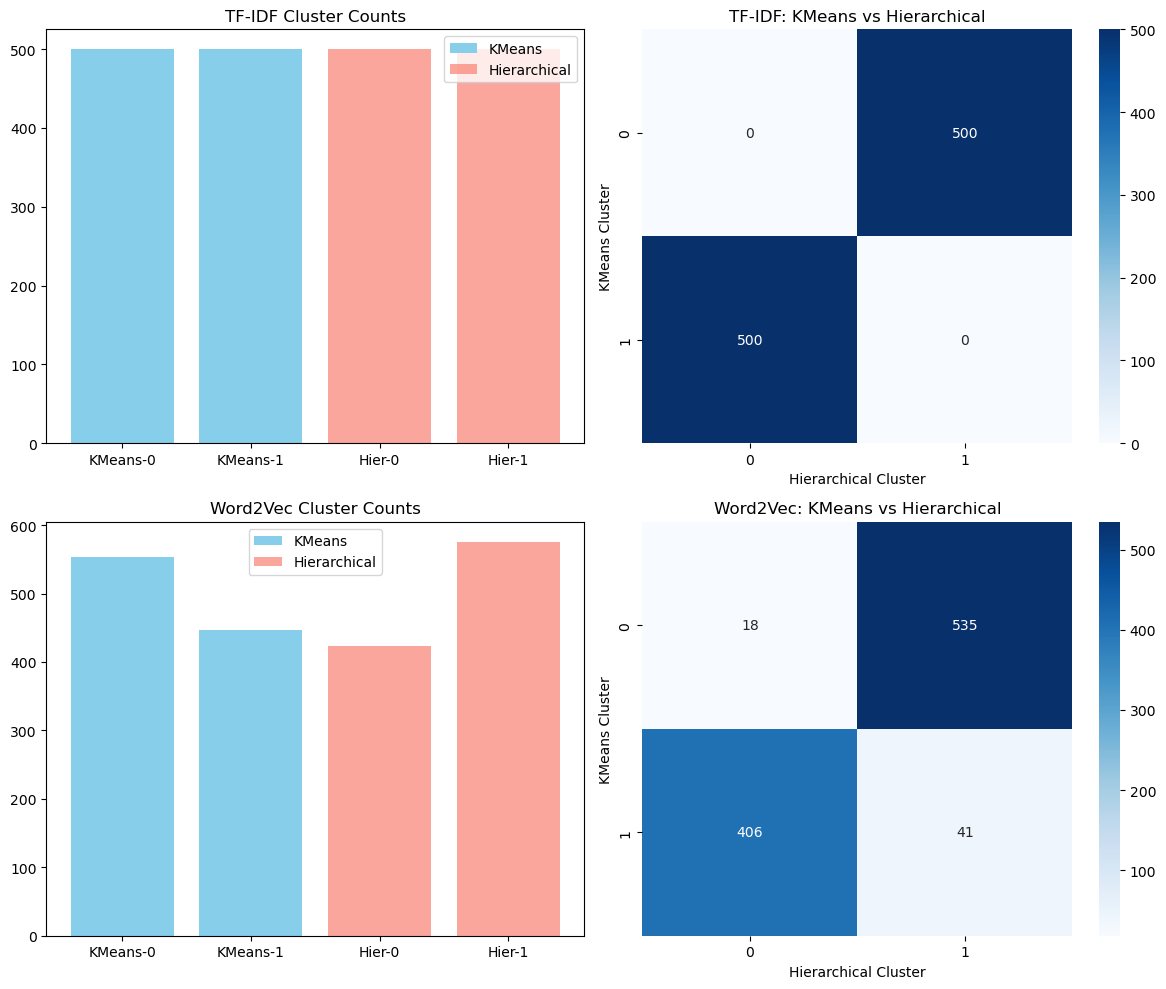

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# KMeans clusters (TF-IDF)
kmeans_clusters = df['cluster']
# Hierarchical clusters (TF-IDF)
hier_clusters_tfidf = agg_tfidf.fit_predict(X.toarray())

# KMeans clusters (Word2Vec)
kmeans_w2v_clusters = df['w2v_cluster']
# Hierarchical clusters (Word2Vec)
hier_clusters_w2v = agg_w2v.fit_predict(sentence_vecs)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar plot: KMeans vs Hierarchical (TF-IDF)
axes[0, 0].bar(['KMeans-0', 'KMeans-1'], [(kmeans_clusters == 0).sum(), (kmeans_clusters == 1).sum()], color='skyblue', label='KMeans')
axes[0, 0].bar(['Hier-0', 'Hier-1'], [(hier_clusters_tfidf == 0).sum(), (hier_clusters_tfidf == 1).sum()], color='salmon', alpha=0.7, label='Hierarchical')
axes[0, 0].set_title('TF-IDF Cluster Counts')
axes[0, 0].legend()

# Confusion matrix: KMeans vs Hierarchical (TF-IDF)
cm_tfidf = confusion_matrix(kmeans_clusters, hier_clusters_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('TF-IDF: KMeans vs Hierarchical')
axes[0, 1].set_xlabel('Hierarchical Cluster')
axes[0, 1].set_ylabel('KMeans Cluster')

# Bar plot: KMeans vs Hierarchical (Word2Vec)
axes[1, 0].bar(['KMeans-0', 'KMeans-1'], [(kmeans_w2v_clusters == 0).sum(), (kmeans_w2v_clusters == 1).sum()], color='skyblue', label='KMeans')
axes[1, 0].bar(['Hier-0', 'Hier-1'], [(hier_clusters_w2v == 0).sum(), (hier_clusters_w2v == 1).sum()], color='salmon', alpha=0.7, label='Hierarchical')
axes[1, 0].set_title('Word2Vec Cluster Counts')
axes[1, 0].legend()

# Confusion matrix: KMeans vs Hierarchical (Word2Vec)
cm_w2v = confusion_matrix(kmeans_w2v_clusters, hier_clusters_w2v)
sns.heatmap(cm_w2v, annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('Word2Vec: KMeans vs Hierarchical')
axes[1, 1].set_xlabel('Hierarchical Cluster')
axes[1, 1].set_ylabel('KMeans Cluster')

plt.tight_layout()
plt.show()

--- Cluster Quality Stats ---
KMeans TF-IDF: Silhouette = 0.076, Davies-Bouldin = 3.477
Hierarchical TF-IDF: Silhouette = 0.076, Davies-Bouldin = 3.477
KMeans Word2Vec: Silhouette = 0.413, Davies-Bouldin = 0.908
Hierarchical Word2Vec: Silhouette = 0.390, Davies-Bouldin = 0.949


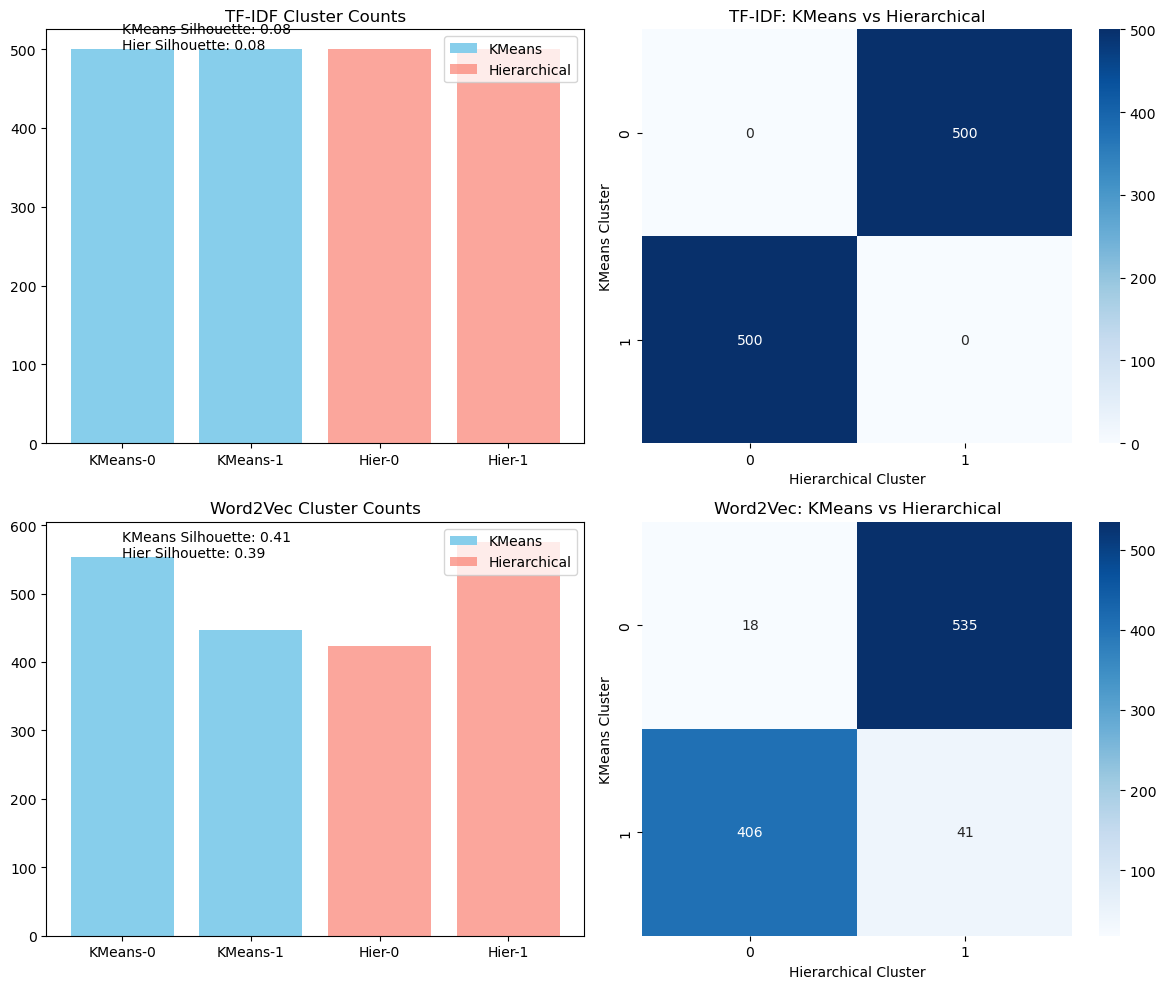

In [29]:
# Print cluster quality stats for both methods
print("--- Cluster Quality Stats ---")
print(f"KMeans TF-IDF: Silhouette = {silhouette_tfidf:.3f}, Davies-Bouldin = {davies_tfidf:.3f}")
print(f"Hierarchical TF-IDF: Silhouette = {silhouette_hier_tfidf:.3f}, Davies-Bouldin = {davies_hier_tfidf:.3f}")
print(f"KMeans Word2Vec: Silhouette = {silhouette_w2v:.3f}, Davies-Bouldin = {davies_w2v:.3f}")
print(f"Hierarchical Word2Vec: Silhouette = {silhouette_hier_w2v:.3f}, Davies-Bouldin = {davies_hier_w2v:.3f}")

# Show the comparison plots (already in previous cell)
# If you want to display stats on the plot, you can annotate them as well:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].bar(['KMeans-0', 'KMeans-1'], [(kmeans_clusters == 0).sum(), (kmeans_clusters == 1).sum()], color='skyblue', label='KMeans')
axes[0, 0].bar(['Hier-0', 'Hier-1'], [(hier_clusters_tfidf == 0).sum(), (hier_clusters_tfidf == 1).sum()], color='salmon', alpha=0.7, label='Hierarchical')
axes[0, 0].set_title('TF-IDF Cluster Counts')
axes[0, 0].legend()
axes[0, 0].text(0, max((kmeans_clusters == 0).sum(), (hier_clusters_tfidf == 0).sum()), f"KMeans Silhouette: {silhouette_tfidf:.2f}\nHier Silhouette: {silhouette_hier_tfidf:.2f}", fontsize=10)

cm_tfidf = confusion_matrix(kmeans_clusters, hier_clusters_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('TF-IDF: KMeans vs Hierarchical')
axes[0, 1].set_xlabel('Hierarchical Cluster')
axes[0, 1].set_ylabel('KMeans Cluster')

axes[1, 0].bar(['KMeans-0', 'KMeans-1'], [(kmeans_w2v_clusters == 0).sum(), (kmeans_w2v_clusters == 1).sum()], color='skyblue', label='KMeans')
axes[1, 0].bar(['Hier-0', 'Hier-1'], [(hier_clusters_w2v == 0).sum(), (hier_clusters_w2v == 1).sum()], color='salmon', alpha=0.7, label='Hierarchical')
axes[1, 0].set_title('Word2Vec Cluster Counts')
axes[1, 0].legend()
axes[1, 0].text(0, max((kmeans_w2v_clusters == 0).sum(), (hier_clusters_w2v == 0).sum()), f"KMeans Silhouette: {silhouette_w2v:.2f}\nHier Silhouette: {silhouette_hier_w2v:.2f}", fontsize=10)

cm_w2v = confusion_matrix(kmeans_w2v_clusters, hier_clusters_w2v)
sns.heatmap(cm_w2v, annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('Word2Vec: KMeans vs Hierarchical')
axes[1, 1].set_xlabel('Hierarchical Cluster')
axes[1, 1].set_ylabel('KMeans Cluster')

plt.tight_layout()
plt.show()

## Train-Test Split
Let's split the data into train and test sets before clustering. We'll use 80% for training and 20% for testing.

In [30]:
from sklearn.model_selection import train_test_split

# Split sentences and labels into train and test sets
sentences_train, sentences_test, labels_train, labels_test = train_test_split(
    sentences, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Train size: {len(sentences_train)}")
print(f"Test size: {len(sentences_test)}")

# Recreate DataFrames for train and test
train_df = pd.DataFrame({'sentence': sentences_train, 'label': labels_train})
test_df = pd.DataFrame({'sentence': sentences_test, 'label': labels_test})

display(train_df.head())
display(test_df.head())

Train size: 800
Test size: 200


,sentence,label
0,The table was sold in the drawer quickly.,household
1,The lion roared on the bed happily.,animal
2,The window was sold in the corner bravely.,household
3,The rat hunted on the food gracefully.,animal
4,The table was bought in the balcony bravely.,household


,sentence,label
0,The lamp was cleaned in the corner eagerly.,household
1,The cat ran on the field sadly.,animal
2,The elephant hunted on the bed sadly.,animal
3,The cat hid on the tree bravely.,animal
4,The table opened in the wall silently.,household


## Clustering and Evaluation on Train/Test Sets
Let's extract features, fit clustering on the train set, predict clusters for the test set, and evaluate cluster quality for both KMeans and Hierarchical methods.

In [31]:
# --- TF-IDF Feature Extraction ---
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

# --- KMeans Clustering ---
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_train_labels = kmeans.fit_predict(X_train)
kmeans_test_labels = kmeans.predict(X_test)

from sklearn.metrics import silhouette_score, davies_bouldin_score
print("KMeans TF-IDF Train Silhouette:", silhouette_score(X_train, kmeans_train_labels))
print("KMeans TF-IDF Train Davies-Bouldin:", davies_bouldin_score(X_train.toarray(), kmeans_train_labels))
print("KMeans TF-IDF Test Silhouette:", silhouette_score(X_test, kmeans_test_labels))
print("KMeans TF-IDF Test Davies-Bouldin:", davies_bouldin_score(X_test.toarray(), kmeans_test_labels))

# --- Hierarchical Clustering ---
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
hier_train_labels = agg.fit_predict(X_train.toarray())
hier_test_labels = agg.fit_predict(X_test.toarray())

print("Hierarchical TF-IDF Train Silhouette:", silhouette_score(X_train, hier_train_labels))
print("Hierarchical TF-IDF Train Davies-Bouldin:", davies_bouldin_score(X_train.toarray(), hier_train_labels))
print("Hierarchical TF-IDF Test Silhouette:", silhouette_score(X_test, hier_test_labels))
print("Hierarchical TF-IDF Test Davies-Bouldin:", davies_bouldin_score(X_test.toarray(), hier_test_labels))

KMeans TF-IDF Train Silhouette: 0.07616514989758169
KMeans TF-IDF Train Davies-Bouldin: 3.4757241293808607
KMeans TF-IDF Test Silhouette: 0.07545445677323528
KMeans TF-IDF Test Davies-Bouldin: 3.4046799942670902
Hierarchical TF-IDF Train Silhouette: 0.07616514989758169
Hierarchical TF-IDF Train Davies-Bouldin: 3.4757241293808607
Hierarchical TF-IDF Test Silhouette: 0.07545445677323528
Hierarchical TF-IDF Test Davies-Bouldin: 3.4046799942670902


In [32]:
# --- Word2Vec Feature Extraction ---
from gensim.models import Word2Vec
import numpy as np

tokenized_train = [s.lower().replace('.', '').split() for s in sentences_train]
tokenized_test = [s.lower().replace('.', '').split() for s in sentences_test]

w2v_model = Word2Vec(tokenized_train, vector_size=50, window=3, min_count=1, workers=1, seed=42)

sentence_vecs_train = np.vstack([np.mean([w2v_model.wv[word] for word in tokens], axis=0) for tokens in tokenized_train])
sentence_vecs_test = np.vstack([np.mean([w2v_model.wv[word] if word in w2v_model.wv else np.zeros(50) for word in tokens], axis=0) for tokens in tokenized_test])

# --- KMeans Clustering ---
kmeans_w2v = KMeans(n_clusters=2, random_state=42)
kmeans_w2v_train_labels = kmeans_w2v.fit_predict(sentence_vecs_train)
kmeans_w2v_test_labels = kmeans_w2v.predict(sentence_vecs_test)

print("KMeans Word2Vec Train Silhouette:", silhouette_score(sentence_vecs_train, kmeans_w2v_train_labels))
print("KMeans Word2Vec Train Davies-Bouldin:", davies_bouldin_score(sentence_vecs_train, kmeans_w2v_train_labels))
print("KMeans Word2Vec Test Silhouette:", silhouette_score(sentence_vecs_test, kmeans_w2v_test_labels))
print("KMeans Word2Vec Test Davies-Bouldin:", davies_bouldin_score(sentence_vecs_test, kmeans_w2v_test_labels))

# --- Hierarchical Clustering ---
agg_w2v = AgglomerativeClustering(n_clusters=2)
hier_w2v_train_labels = agg_w2v.fit_predict(sentence_vecs_train)
hier_w2v_test_labels = agg_w2v.fit_predict(sentence_vecs_test)

print("Hierarchical Word2Vec Train Silhouette:", silhouette_score(sentence_vecs_train, hier_w2v_train_labels))
print("Hierarchical Word2Vec Train Davies-Bouldin:", davies_bouldin_score(sentence_vecs_train, hier_w2v_train_labels))
print("Hierarchical Word2Vec Test Silhouette:", silhouette_score(sentence_vecs_test, hier_w2v_test_labels))
print("Hierarchical Word2Vec Test Davies-Bouldin:", davies_bouldin_score(sentence_vecs_test, hier_w2v_test_labels))

KMeans Word2Vec Train Silhouette: 0.30034593
KMeans Word2Vec Train Davies-Bouldin: 1.2092338387953376
KMeans Word2Vec Test Silhouette: 0.2843796
KMeans Word2Vec Test Davies-Bouldin: 1.2413439023563457
Hierarchical Word2Vec Train Silhouette: 0.28057298
Hierarchical Word2Vec Train Davies-Bouldin: 1.256575399906624
Hierarchical Word2Vec Test Silhouette: 0.27474996
Hierarchical Word2Vec Test Davies-Bouldin: 1.27083639440993
